In [12]:
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pathdata = "../data/interim/"
filename = pathdata + "Zlvl_Vabs"
with open(filename, 'rb') as f:
    sVabsbyz= pickle.load(f)

In [13]:
Zdata = [value for dico in sVabsbyz for key,value in dico.items() if key=='Depth']

In [14]:
print(f"{sVabsbyz[1].keys()} for Depth:{Zdata}")

print(f"\nDepth {sVabsbyz[1]['Depth']}m")
print(f"\nData:\n{sVabsbyz[1]['Data']}")


dict_keys(['Depth', 'Data']) for Depth:['105m', '505m', '805m', '2505m', 'Mean']

Depth 505mm

Data:
      IB21S  IB20S  IB19S  IB18S   IB17  IB16A   IB16   IB15   IB14  IB13A  \
Year                                                                         
1996    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1997    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1998    NaN    NaN    NaN    NaN    NaN  0.034 -0.016 -0.064 -0.110  0.037   
1999    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2000    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2001    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2005    NaN  0.006 -0.208 -0.116    NaN    NaN    NaN    NaN    NaN    NaN   
2006  0.044  0.108 -0.105  0.075 -0.149 -0.033  0.065  0.039 -0.036  0.014   
2007    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2009    NaN    NaN    NaN    NaN    NaN  

## TODO1:  MAKE box plot of velocity as function of station (look seaborn functions)

#### Firstly pivot table need to be melted to facilitate use with seaborn

In [15]:
# Select specific lvl
ilvl = 0

zlvl = sVabsbyz[ilvl]['Depth']
dftemp = sVabsbyz[ilvl]['Data']


Reset the year index to bring it back as a dataframe variable:

In [16]:
dftemp= dftemp.reset_index()

\
Load reference dataframe with cruise ID 

In [17]:
pathdir = '../data/raw/csv_ctdgrid/'
file3 = pathdir+'/'+'EELCTDandLADCP_refdate.csv'
dfdate = pd.read_csv(file3,sep=',', index_col=None, 
                     header=0)
print(dfdate)

   CruiseID  Year  Month
0    d22396  1996     10
1    d23097  1997      9
2    d23398  1998      5
3    d24299  1999      9
4    d24500  2000      2
5    d25301  2001     12
6   cd17605  2005     10
7    d31206  2006     10
8    d32107  2007      8
9    d34009  2009      6
10   d35110  2010      5
11   d36511  2011      5
12    jc086  2013      5
13    jr302  2014      7
14    dy031  2015      6
15    dy052  2016      6
16    dy078  2017      5


\
Merge df dataframe with metadata to get the CruiseID associated with the year:

In [18]:
dfmerg=pd.merge(dfdate[['CruiseID','Year']],
                    dftemp,
                    how='left',
                    on='Year')
dfmerg.head()

,CruiseID,Year,IB22S,IB21S,IB20S,IB19S,IB18S,IB17,IB16A,IB16,...,P,Q1,Q,R,S,15G,T,14G,9G,8G
0,d22396,1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.071,0.155,0.218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,d23097,1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.001,0.006,0.048,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,d23398,1998,NaN,NaN,NaN,NaN,NaN,NaN,0.041,-0.012,...,0.059,0.237,0.296,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d24299,1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.133,0.138,0.147,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d24500,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.110,0.173,0.035,NaN,NaN,NaN,NaN,NaN,NaN,NaN


\
Melt dataframe for boxplots

In [19]:
dfmelt = pd.melt(dfmerg,
                id_vars=["CruiseID","Year"],
                var_name="Staname",
                value_name="Vabs"+'_'+zlvl)
dfmelt

,CruiseID,Year,Staname,Vabs_105m
0,d22396,1996,IB22S,NaN
1,d23097,1997,IB22S,NaN
2,d23398,1998,IB22S,NaN
3,d24299,1999,IB22S,NaN
4,d24500,2000,IB22S,NaN
...,...,...,...,...
964,jc086,2013,8G,NaN
965,jr302,2014,8G,NaN
966,dy031,2015,8G,-0.070
967,dy052,2016,8G,-0.128


\
Plot "catplot" figure

<Figure size 1152x720 with 0 Axes>

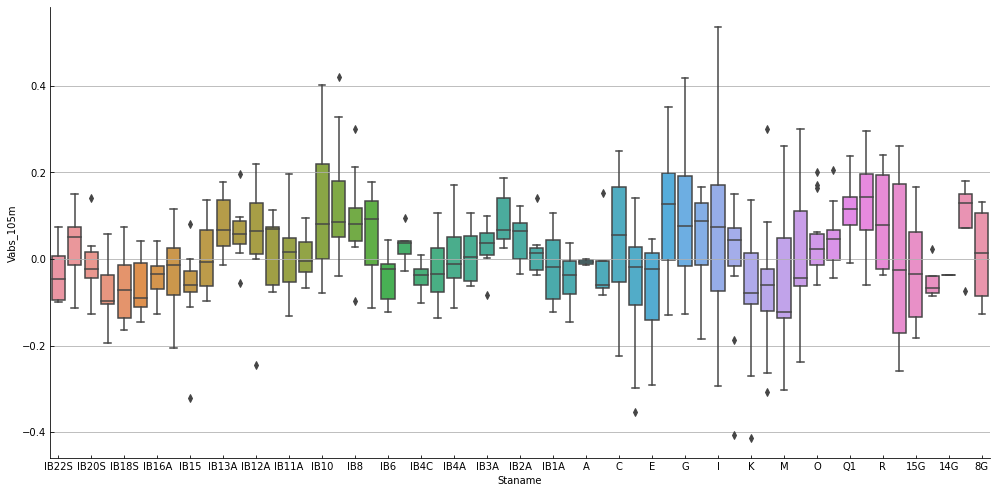

In [20]:
# Boxplot of the 
plt.figure(figsize=(16, 10))
g =sns.catplot(x="Staname",y="Vabs_105m",
            kind='box',
            data=dfmelt,    
            height=7, # make the plot 5 units high
            aspect=2) # height should be three times width)

# Display less xtick 
xticks = list(g.ax.get_xticks())
xticklab = list(g.ax.get_xticklabels())
g.ax.set_xticks(xticks[::2])
g.ax.set_xticklabels(xticklab[::2]);
g.ax.tick_params(direction='in', bottom=True, left=True)
g.ax.yaxis.grid(True)

## TODO1:  Plot also number of cruises for each station and bathymetry as additional subplot?

## TODO2:  MAKE heatplot map of difference between LADCP and geostrophic velocity (at specific depth and for average)